# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

# Set style for visualizations
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
# Load the dataset
df_pre = pd.read_csv('diabetes_prediction_dataset.csv')
df_pre.head(2)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0


In [3]:
df_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [4]:
# Statistical summary
print("\nStatistical Summary:")
display(df_pre.describe(include='all'))


Statistical Summary:


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000,100000.000000,100000.00000,100000.000000,100000,100000.000000,100000.000000,100000.000000,100000.000000
unique,3,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN
top,Female,NaN,NaN,NaN,No Info,NaN,NaN,NaN,NaN
freq,58552,NaN,NaN,NaN,35816,NaN,NaN,NaN,NaN
mean,NaN,41.885856,0.07485,0.039420,NaN,27.320767,5.527507,138.058060,0.085000
std,NaN,22.516840,0.26315,0.194593,NaN,6.636783,1.070672,40.708136,0.278883
min,NaN,0.080000,0.00000,0.000000,NaN,10.010000,3.500000,80.000000,0.000000
25%,NaN,24.000000,0.00000,0.000000,NaN,23.630000,4.800000,100.000000,0.000000
50%,NaN,43.000000,0.00000,0.000000,NaN,27.320000,5.800000,140.000000,0.000000
75%,NaN,60.000000,0.00000,0.000000,NaN,29.580000,6.200000,159.000000,0.000000


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [5]:
# mendefinisikan kolom pada dataset 'diabetes'.
cat_cols = ['gender', 'hypertension', 'heart_disease', 'smoking_history']
num_cols = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

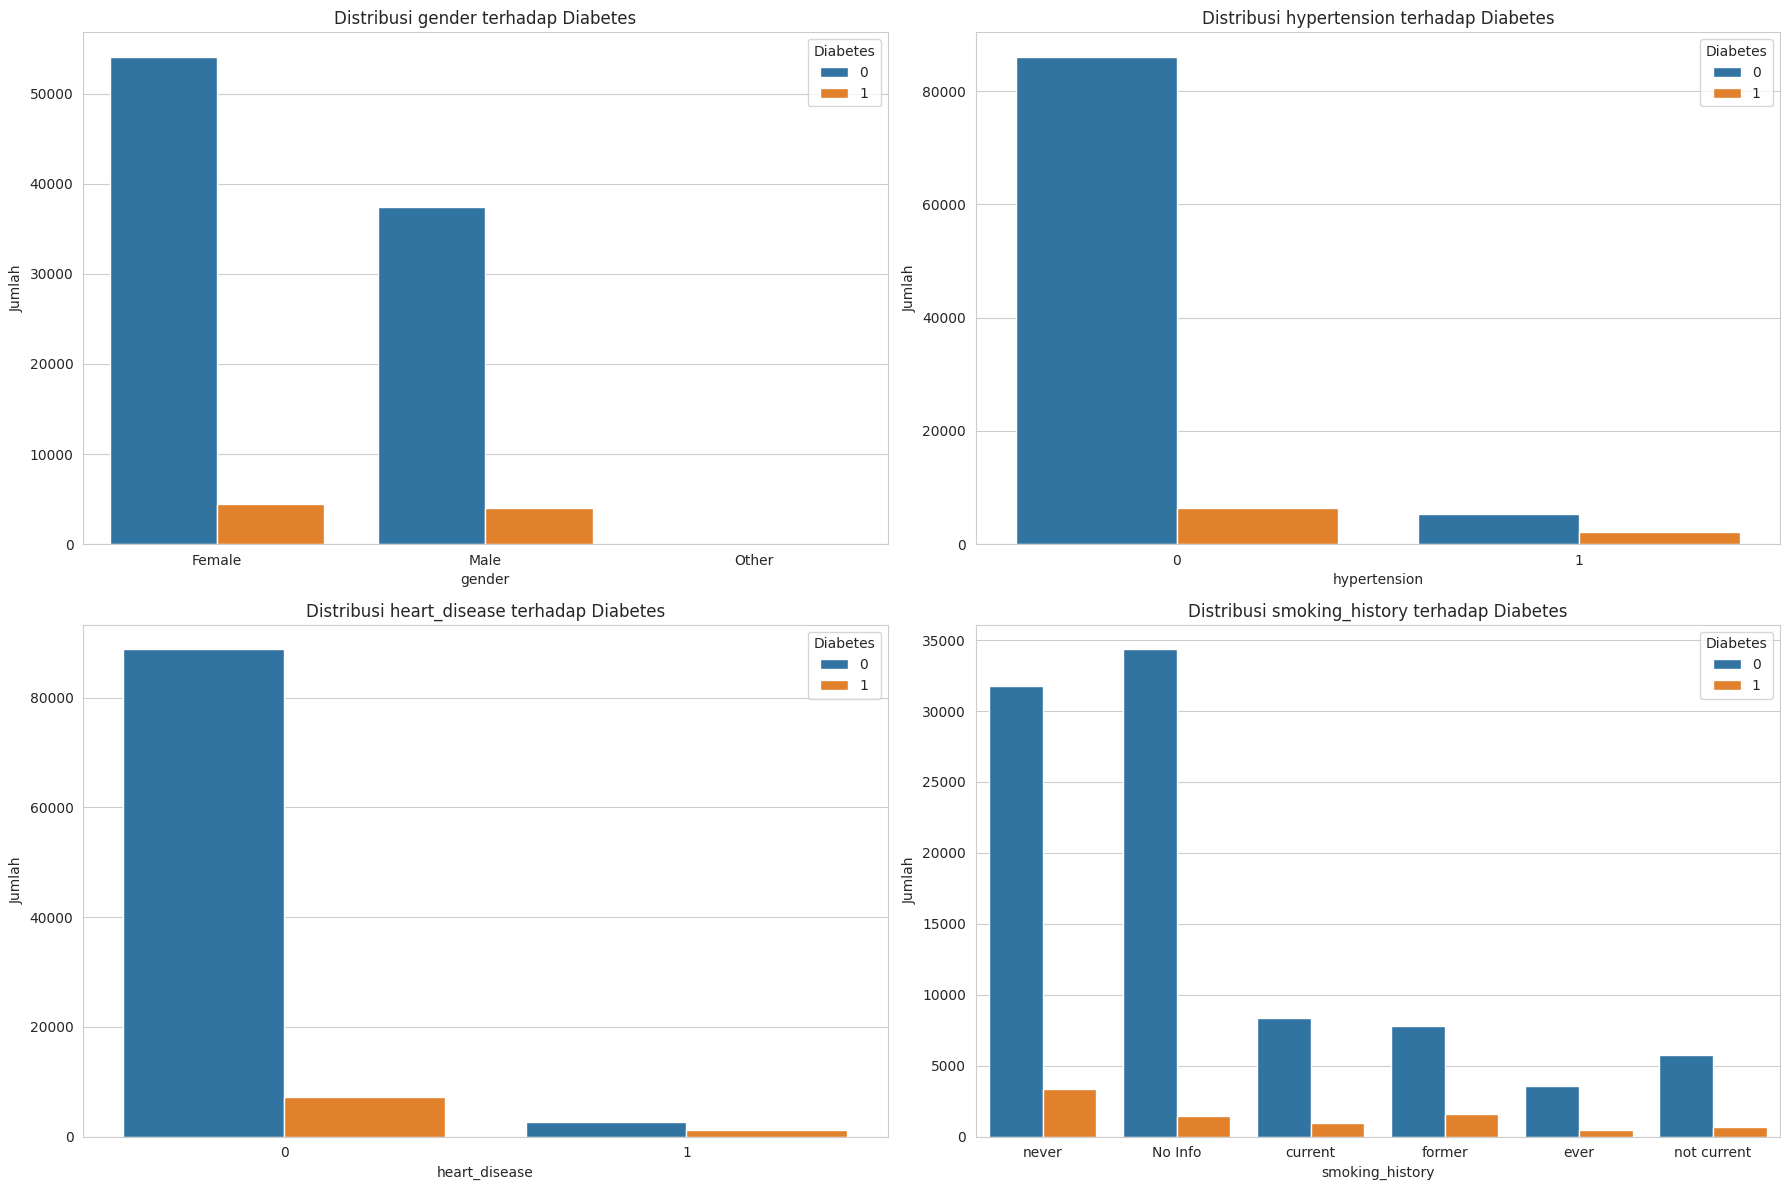

In [6]:
# Visualisasi countplot untuk kolom kategori
fig, axs = plt.subplots(2, 2, figsize=(18, 12))

for ax, col in zip(axs.ravel(), cat_cols):
    sns.countplot(data=df_pre, x=col, hue='diabetes', ax=ax)
    ax.set_title(f'Distribusi {col} terhadap Diabetes')
    ax.set_xlabel(col)
    ax.set_ylabel("Jumlah")
    ax.legend(title="Diabetes")

plt.tight_layout()
plt.show()

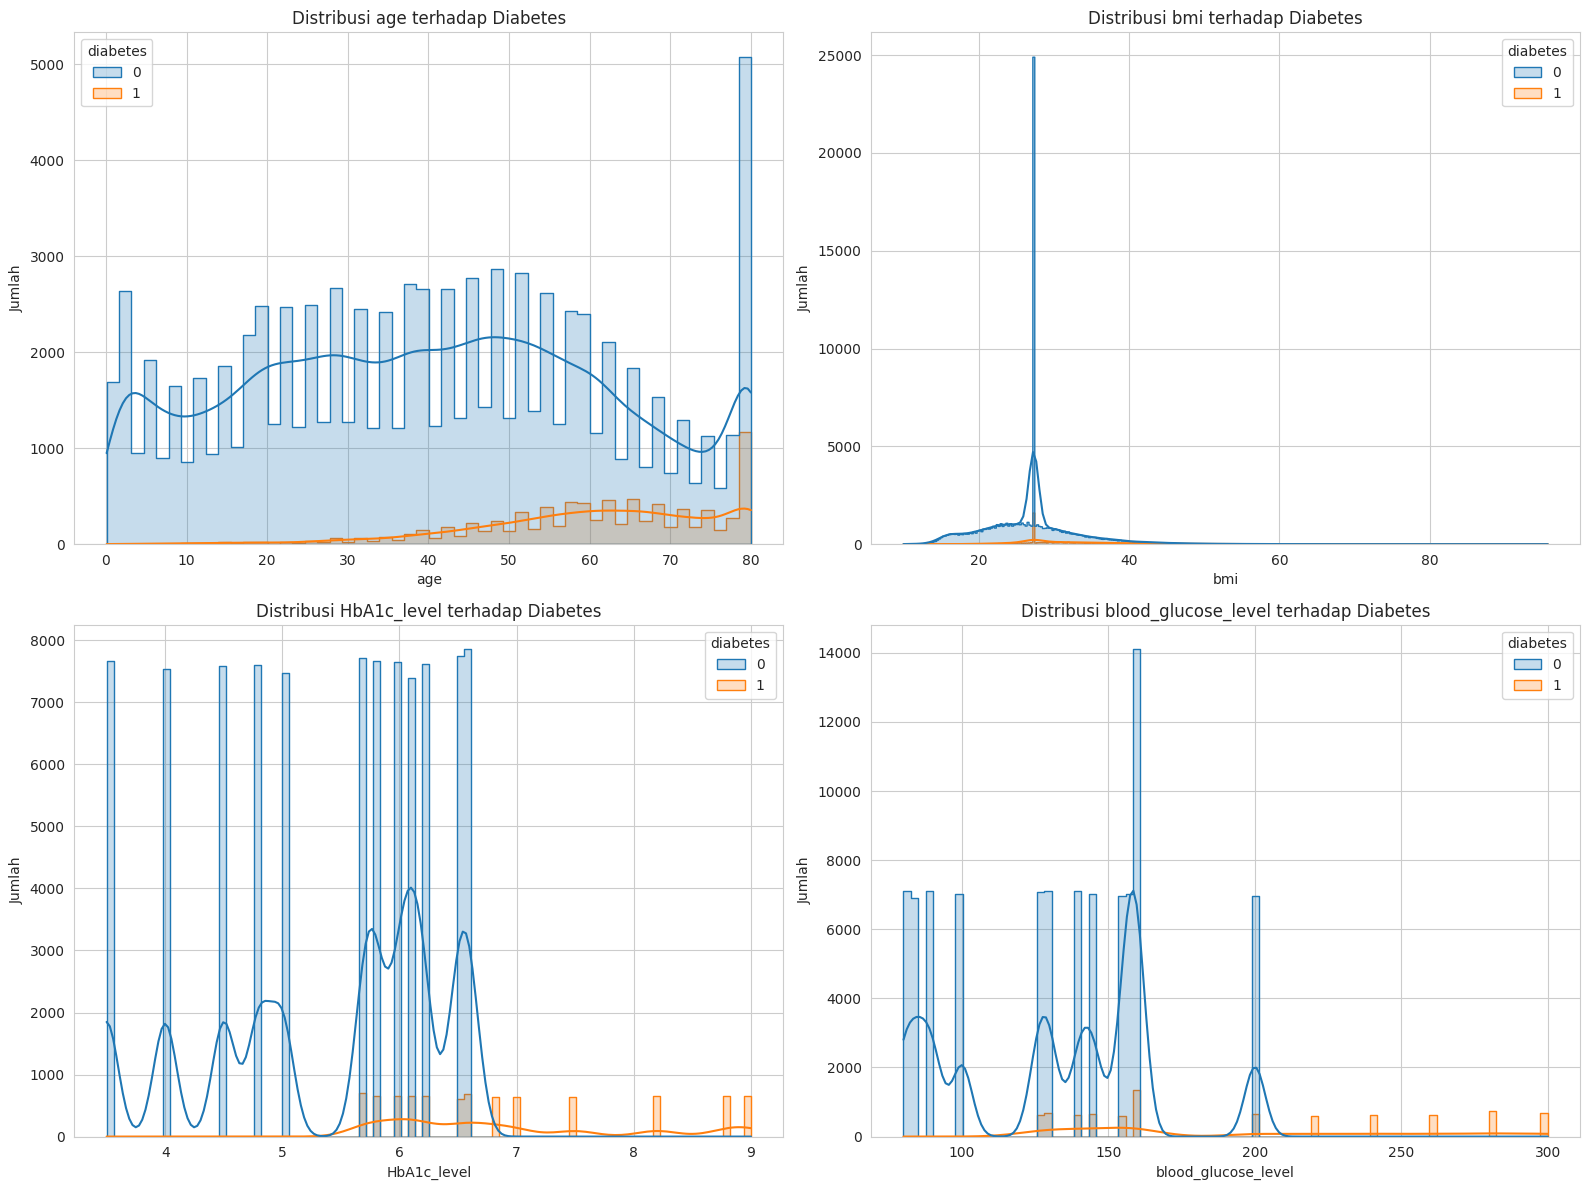

In [7]:
# menampilkan visualisasi distribusi diabetes dengan kolom kategori.
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
for ax, col in zip(axs.ravel(), num_cols):
    sns.histplot(data=df_pre, x=col, kde=True, hue='diabetes', element="step", ax=ax)
    ax.set_title(f'Distribusi {col} terhadap Diabetes')
    ax.set_xlabel(col)
    ax.set_ylabel('Jumlah')

plt.tight_layout()
plt.show()


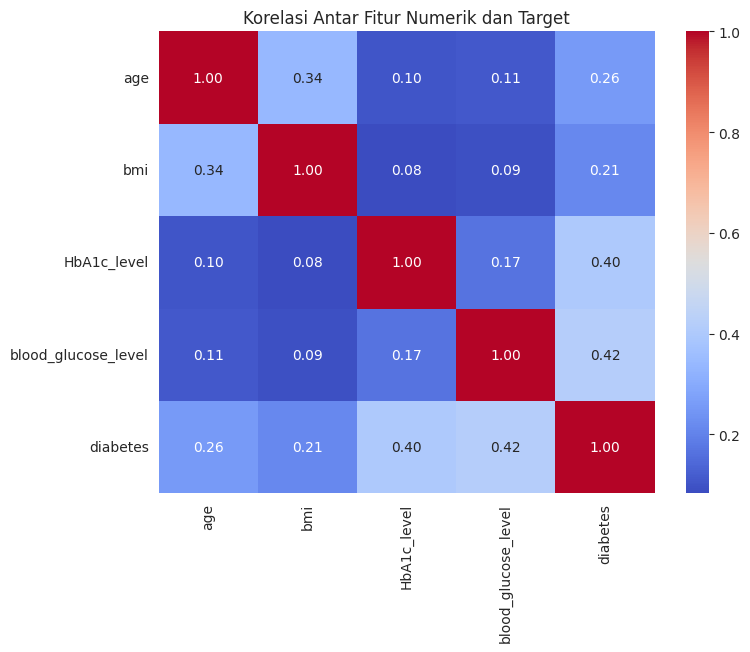

In [ ]:
# Visualisasi Korelasi fitur numerik
plt.figure(figsize=(8, 6))
correlation_matrix = df_pre[num_cols + ['diabetes']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasi Antar Fitur Numerik dan Target")
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [8]:
# 1. Menampilkan jumlah data missing value dan duplikat data
print('jumlah missing value',df_pre.isnull().sum())
print('jumlah duplikat',df_pre.duplicated().sum())

jumlah missing value gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64
jumlah duplikat 3854


In [9]:
# 2. Menghapus data duplikat
df_pre = df_pre.drop_duplicates()
print('jumlah data duplikat yang telah dibersihkan',df_pre.duplicated().sum())
print('jumlah baris dan kolom',df_pre.shape)

jumlah data duplikat yang telah dibersihkan 0
jumlah baris dan kolom (96146, 9)


In [10]:
# 3. melakukan Standarisasi
scaler = StandardScaler()
df_scaled = df_pre.copy()
df_scaled[num_cols] = scaler.fit_transform(df_pre[num_cols])

In [11]:
# 4. Melakukan Tahap menangani oulier
def remove_outliers_iqr(data, columns):
    df_proces = data.copy()
    for col in columns:
        Q1 = df_proces[col].quantile(0.25)
        Q3 = df_proces[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_proces = df_proces[(df_proces[col] >= lower_bound) & (df_proces[col] <= upper_bound)]
    return df_proces

# Buang outlier dari data yang sudah diskalakan
df_proces= remove_outliers_iqr(df_scaled, num_cols)

In [12]:
# Melakukan Label Encoding pada Kolom Kategori
from sklearn.preprocessing import LabelEncoder
target = ['gender','smoking_history']

# Encoding kategori ordinal/sederhana
le = LabelEncoder()
for col in target:
    df_proces[col] = le.fit_transform(df_proces[col])
df_proces.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,1.700840,0,1,4,-0.314947,0.994563,0.043554,0
1,0,0.543372,0,0,0,-0.000216,0.994563,-1.423096,0
2,1,-0.614096,0,0,4,-0.000216,0.155970,0.483549,0
3,0,-0.257952,0,0,1,-0.572051,-0.496269,0.410216,0
4,1,1.522768,1,1,1,-1.061141,-0.682623,0.410216,0


In [13]:
# Melakukan Data Splitting
X = df_proces.drop(['gender', 'smoking_history'], axis=1)
y = df_proces['diabetes']
print("Jumlah Kolom dan baris fitur X :", X.shape)
print("Jumlah Kolom target y", y.shape)

Jumlah Kolom dan baris fitur X : (88195, 7)
Jumlah Kolom target y (88195,)


In [14]:
# Train data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Informasi data training dan testing sets:")
print(" Jumlah X_train:", X_train.shape)
print("Jumlah X_test:", X_test.shape)
print("Jumlah y_train:", y_train.shape)
print("Jumlah y_test:", y_test.shape)

Informasi data training dan testing sets:
 Jumlah X_train: (70556, 7)
Jumlah X_test: (17639, 7)
Jumlah y_train: (70556,)
Jumlah y_test: (17639,)


In [15]:
# Modelling Data train dan test menggunakan Random Forest.
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

model = RandomForestClassifier(n_estimators=50, random_state=42, max_depth=15)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, n_estimators=50, random_state=42)

In [16]:
# Melakukan Prediksi pada data test
y_pred = model.predict(X_test)

# Evaluasi model
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Akurasi: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16719
           1       1.00      1.00      1.00       920

    accuracy                           1.00     17639
   macro avg       1.00      1.00      1.00     17639
weighted avg       1.00      1.00      1.00     17639



In [17]:
# Evaluasi Model pada data test
# Model Training: Random Forest Regressor
# Random Forest Regressor
print("\n--- Random Forest Regressor Model ---")
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)
rf_predictions = rf_regressor.predict(X_test)
print("Random Forest R-squared:", r2_score(y_test, rf_predictions))
print("Random Forest Mean Squared Error:", mean_squared_error(y_test, rf_predictions))


--- Random Forest Regressor Model ---
Random Forest R-squared: 1.0
Random Forest Mean Squared Error: 0.0


In [19]:
df_proces.to_csv('diabetes_cleaned.csv', index=False)